In [5]:
import numpy as np
import h5py
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from functions.functions_image_training import *
from scipy.misc import imresize
from PIL import Image
%matplotlib inline

In [3]:
rejects = 'data/images/rejects/'
mainfolder = 'data/images/quality_confirmed/'
img_dict, cat_list = classifier_folder_to_jpg_dict_list(mainfolder,rejects)
list_of_tuples = cat_list_to_list_of_tuples(img_dict, cat_list)
############### INPUTS: including bacth size, list of tuples and image dictionary###########################
total_num = len(list_of_tuples)
classes = len(img_dict)
single_input_shape = (450,450,3)
target_height,target_width,target_depth = single_input_shape
print(img_dict)

{1: 'High_Quality', 2: 'Medium_Quality', 3: 'Unable_Poor'}


In [10]:
j=0
for i in range(total_num):

    cycle_image = mpimg.imread(mainfolder + list_of_tuples[i][1])
    cycle_label =list_of_tuples[i][0]
    UDcycle_image = np.flipud(cycle_image)
    LRflip_image = np.fliplr(cycle_image)
    UDLRflip_image = np.flipud(LRflip_image)
    
    with h5py.File('data/qualdataW.h5', 'a') as qd:
    
        qd.create_dataset("image"+ str(j),data=cycle_image,compression="gzip",compression_opts=9)
        qd.create_dataset("label" + str(j),data=cycle_label,compression="gzip",compression_opts=9)
        j+=1
        qd.create_dataset("image"+ str(j),data=UDcycle_image,compression="gzip",compression_opts=9)
        qd.create_dataset("label" + str(j),data=cycle_label,compression="gzip",compression_opts=9)
        j+=1
        qd.create_dataset("image"+ str(j),data=LRflip_image,compression="gzip",compression_opts=9)
        qd.create_dataset("label" + str(j),data=cycle_label,compression="gzip",compression_opts=9)
        j+=1
        qd.create_dataset("image"+ str(j),data=UDLRflip_image,compression="gzip",compression_opts=9)
        qd.create_dataset("label" + str(j),data=cycle_label,compression="gzip",compression_opts=9)
        j+=1
        
    if i %100 ==0:
        print(i/total_num)

0.0
0.05263157894736842
0.10526315789473684
0.15789473684210525
0.21052631578947367
0.2631578947368421
0.3157894736842105
0.3684210526315789
0.42105263157894735
0.47368421052631576
0.5263157894736842
0.5789473684210527
0.631578947368421
0.6842105263157895
0.7368421052631579
0.7894736842105263
0.8421052631578947
0.8947368421052632
0.9473684210526315


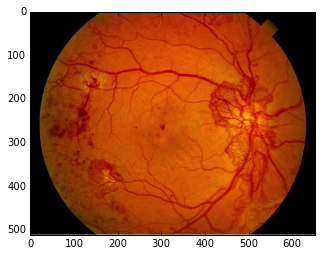

In [6]:
cycle_image = mpimg.imread('/Users/carsonlam/ML/severeNVD.jpg')
plt.imshow(cycle_image)
plt.show()

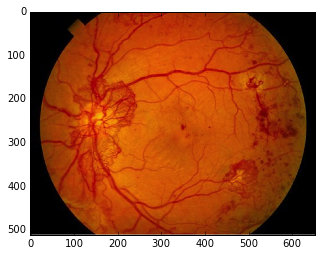

In [7]:
cycle_image = np.fliplr(cycle_image)
plt.imshow(cycle_image)
plt.show()

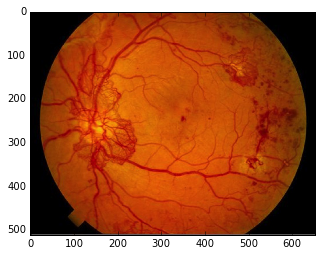

In [8]:
cycle_image = np.flipud(cycle_image)
plt.imshow(cycle_image)
plt.show()